# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Sushanta Shrestha

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Check installed packages
!pip list

print('All prereqs installed.')


Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsons

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the archived article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Step 1: Send a GET request to the URL
response = requests.get(url)
if response.status_code == 200:
    # Step 2: Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Step 3: Save the HTML to a .pkl file
    with open("article_html.pkl", "wb") as file:
        pickle.dump(soup.prettify(), file)
    print("Article HTML has been saved to 'article_html.pkl'.")
else:
    print(f"Failed to retrieve the URL. Status code: {response.status_code}")


Article HTML has been saved to 'article_html.pkl'.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
import pickle
from bs4 import BeautifulSoup

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the plain text from the parsed HTML
article_text = soup.get_text()

# Step 4: Print the extracted text
print(article_text)






















    How Laser Headlights Work | Hackaday
   








































































































          39 captures
         

          22 Mar 2021 - 19 Apr 2024
         

















           Feb
          

           MAR
          



             Aug
            











           27
          









           2020
          

           2021
          



             2022
            










          success
         

          fail
         











































          About this capture
         









        COLLECTED BY
       




         Organization:
         

           Internet Archive
          




          Focused crawls are collections of frequently-updated webcrawl data from narrow (as opposed to broad or wide) web crawls, often focused on a single domain or subdomain.
          






          Collection:
          

            top_domai

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [12]:
import spacy
from collections import Counter
import os
import pickle

# Ensure the spaCy model is installed
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("SpaCy model 'en_core_web_sm' not found. Downloading...")
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
    print("Model downloaded and loaded successfully!")

# Step 1: Define the path to your article HTML .pkl file
article_html_file = "article_html.pkl"

# Step 2: Check if the .pkl file exists
if not os.path.exists(article_html_file):
    print(f"Error: File '{article_html_file}' not found.")
else:
    # Step 3: Load the article HTML content from the .pkl file
    with open(article_html_file, "rb") as file:
        html_content = pickle.load(file)

    # Step 4: Process the HTML content with spaCy
    from bs4 import BeautifulSoup  # Ensure BeautifulSoup is imported
    soup = BeautifulSoup(html_content, "html.parser")
    article_text = soup.get_text()

    # Step 5: Process the article text through the spaCy pipeline
    doc = nlp(article_text)

    # Step 6: Filter tokens (lowercase, no punctuation, no stopwords, no whitespace)
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

    # Step 7: Count token frequencies
    token_frequencies = Counter(tokens)

    # Step 8: Get the 5 most frequent tokens
    most_common_tokens = token_frequencies.most_common(5)

    # Step 9: Print the results
    print("\nTop 5 Most Frequent Tokens (with Frequencies):")
    for token, freq in most_common_tokens:
        print(f"Token: {token}, Frequency: {freq}")







Top 5 Most Frequent Tokens (with Frequencies):
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130
Token: reply, Frequency: 112


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [13]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup
import os

# Ensure the spaCy model is installed
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("SpaCy model 'en_core_web_sm' not found. Downloading...")
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
    print("Model downloaded and loaded successfully!")

# Step 1: Define the path to your article HTML .pkl file
article_html_file = "article_html.pkl"

# Step 2: Check if the .pkl file exists
if not os.path.exists(article_html_file):
    print(f"Error: File '{article_html_file}' not found.")
else:
    # Step 3: Load the article HTML content from the .pkl file
    with open(article_html_file, "rb") as file:
        html_content = pickle.load(file)

    # Step 4: Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")
    article_text = soup.get_text()

    # Step 5: Process the article text through the spaCy pipeline
    doc = nlp(article_text)

    # Step 6: Filter lemmas (lowercase, no punctuation, no stopwords, no whitespace)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

    # Step 7: Count lemma frequencies
    lemma_frequencies = Counter(lemmas)

    # Step 8: Get the 5 most frequent lemmas
    most_common_lemmas = lemma_frequencies.most_common(5)

    # Step 9: Print the results
    print("\nTop 5 Most Frequent Lemmas (with Frequencies):")
    for lemma, freq in most_common_lemmas:
        print(f"Lemma: {lemma}, Frequency: {freq}")



Top 5 Most Frequent Lemmas (with Frequencies):
Lemma: comment, Frequency: 158
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: report, Frequency: 130
Lemma: reply, Frequency: 112


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [16]:
import spacy
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Load the article HTML content from the .pkl file
article_html_file = "article_html.pkl"
with open(article_html_file, "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content to extract the main text
soup = BeautifulSoup(html_content, "html.parser")
article_body = soup.find("div", class_="article-content")  # Adjust the target element
if article_body:
    article_text = article_body.get_text()
else:
    article_text = soup.get_text()

# Step 3: Process the article text through spaCy
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

# Remove metadata or titles if necessary
if len(sentences) > 1 and "Hackaday" in sentences[0]:
    sentences = sentences[1:]

# Define the scoring functions
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Define interesting tokens and lemmas
interesting_tokens = ["laser", "light", "car", "headlight", "technology"]
interesting_lemmas = ["laser", "light", "car", "headlight", "technology"]

# Test on the first valid sentence
if sentences:
    first_sentence = sentences[0]
    print("First Sentence:", first_sentence)

    # Score the sentence
    token_score = score_sentence_by_token(first_sentence, interesting_tokens)
    lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

    print(f"Token-Based Score: {token_score:.2f}")
    print(f"Lemma-Based Score: {lemma_score:.2f}")
else:
    print("No valid sentences found in the article.")




First Sentence: Collection:
          

            top_domains-00250
           







        TIMESTAMPS
       













   The Wayback Machine - https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/
  







    Skip to content
   







       Hackaday
      




      Primary Menu
     






         Home
        



         Blog
        



         Hackaday.io
        



         Tindie
        



         Hackaday Prize
        



         Submit
        



         About
        





           Search for:
          










        March 27, 2021
       












         How Laser Headlights Work
        




          130 Comments
         


           by:
          


            Lewin Day
           







           March 22, 2021
          
























         When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token-

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

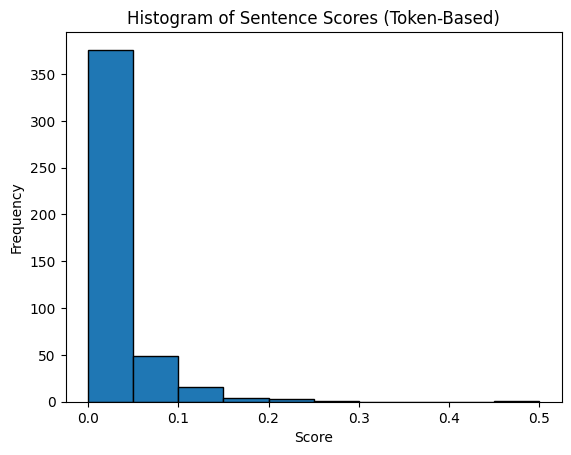

In [ ]:
import matplotlib.pyplot as plt
import spacy
import pickle
from bs4 import BeautifulSoup


# Step 1: Load the article HTML content from the .pkl file
article_html_file = "article_html.pkl"
with open(article_html_file, "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content to extract the main text
soup = BeautifulSoup(html_content, "html.parser")
article_body = soup.find("div", class_="article-content")  # Update class if necessary
article_text = article_body.get_text() if article_body else soup.get_text()

# Step 3: Process the article text through spaCy
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

# Define the token-based scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

# Define interesting tokens (replace with actual tokens from earlier analysis)
interesting_tokens = ["laser", "light", "car", "headlight", "technology"]

# Step 4: Calculate token-based scores for all sentences
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Step 5: Plot a histogram of the scores
plt.hist(scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Token-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()




7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

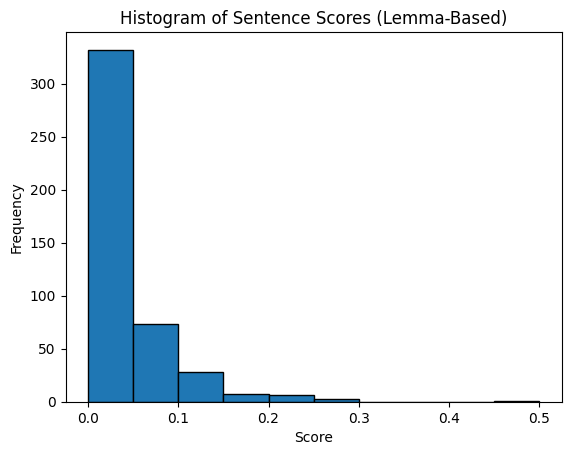

In [ ]:
import matplotlib.pyplot as plt
import spacy
import pickle
from bs4 import BeautifulSoup

# Ensure the spaCy model is loaded
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model...")
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Step 1: Load the article HTML content from the .pkl file
article_html_file = "article_html.pkl"
with open(article_html_file, "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML content to extract the main text
soup = BeautifulSoup(html_content, "html.parser")
article_body = soup.find("div", class_="article-content")  # Update class if necessary
article_text = article_body.get_text() if article_body else soup.get_text()

# Step 3: Process the article text through spaCy
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

# Define the lemma-based scoring function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Define interesting lemmas (replace with actual lemmas from earlier analysis)
interesting_lemmas = ["laser", "light", "car", "headlight", "technology"]

# Step 4: Calculate lemma-based scores for all sentences
lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Step 5: Plot a histogram of the lemma-based scores
plt.hist(lemma_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Lemma-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()




8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Tokens and lemmas that are not nouns (e.g., verbs, adjectives, adverbs) would be omitted from the lists generated in Questions 3 and 4
If we apply this change, the non-noun words like "innovative" and "working" will be excluded from the list of interesting tokens and lemmas. Only nouns like "laser," "light," and "headlight" will be considered.